# Custom CUDA kernels with cupy
In this notebook we will show how to write a custom kernel is basic CUDA code.

See also
* [cupy User-defined kernels](https://docs.cupy.dev/en/stable/user_guide/kernel.html)

In [1]:
import cupy as cp
from cupyx.scipy.ndimage import gaussian_filter
import numpy as np
from skimage.io import imread
import stackview

In [2]:
image = imread("../03b_image_processing/data/blobs.tif")

In [3]:
cp_image = cp.asarray(image[1:], dtype=np.float32)
image1 = gaussian_filter(cp_image, sigma=3)
image2 = gaussian_filter(cp_image, sigma=7)

cupy has a couple of simplifications implemented making it easy to write custom kernels. For example, if we plan to execute the very same operation on all pixels in an image, an ElementwiseKernel does the job.

In [4]:
squared_difference = cp.ElementwiseKernel(
    'T x, T y',
    'T z',
    'z = (x - y) * (x - y)',
    'squared_difference')

After defining such a kernel, you can call it like any other Python function. You just need to make sure the images are cupy images.

In [5]:
sqdiff = squared_difference(image1, image2)

StackViewNDArray([[ 41.303364,  53.488613,  82.03373 , ...,  81.77887 ,
                    43.094448,  27.442148],
                  [ 42.695255,  54.49246 ,  82.26912 , ...,  81.343414,
                    43.876472,  28.565775],
                  [ 45.03658 ,  56.26087 ,  82.989815, ...,  79.240585,
                    44.28921 ,  29.801676],
                  ...,
                  [ 58.352688,  53.26866 ,  43.996933, ...,  25.789291,
                    18.915054,  15.748433],
                  [ 95.59078 ,  88.088005,  74.4026  , ...,  25.966269,
                    19.421057,  16.381983],
                  [118.749   , 109.784424,  93.45354 , ...,  26.126612,
                    19.741205,  16.762568]], dtype=float32)
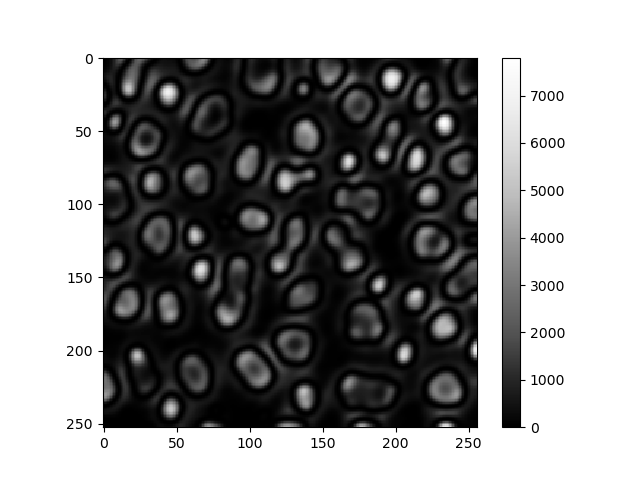
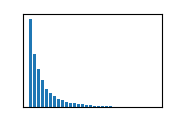

In [6]:
stackview.insight(sqdiff)

For completenes, we view the documentation.

In [7]:
cp.ElementwiseKernel?

Init signature: cp.ElementwiseKernel(self, /, *args, **kwargs)
Docstring:     
ElementwiseKernel(in_params, out_params, operation, name=u'kernel', reduce_dims=True, preamble=u'', no_return=False, return_tuple=False, **kwargs)
User-defined elementwise kernel.

    This class can be used to define an elementwise kernel with or without
    broadcasting.

    The kernel is compiled at an invocation of the
    :meth:`~ElementwiseKernel.__call__` method,
    which is cached for each device.
    The compiled binary is also cached into a file under the
    ``$HOME/.cupy/kernel_cache/`` directory with a hashed file name. The cached
    binary is reused by other processes.

    Args:
        in_params (str): Input argument list.
        out_params (str): Output argument list.
        operation (str): The body in the loop written in CUDA-C/C++.
        name (str): Name of the kernel function. It should be set for
            readability of the performance profiling.
        reduce_dims (bool): If